Question 1: LP- Reformulation
Consider the following optimization problem:

minimize
x∼, y 0.043x1 + 0.027x2 + 0.025x3 + 0.022x4 + 0.045x5 − 0.0275y (1a)
subject to
x1 + 3x2 + x3 + 7x4 + x5 − y ≤ 100, (1b)
x2 + 2x3 + 4x4 ≥ 60, (1c)
2x1 + 2x2 + x3 + x4 + 5x5
x1 − x2 + x3 − x4 + x5
≤ 2.8, (1d)
2x1 + 15x2 + 4x3 + 3x4 − 8x5
x1 + x2 + x3 − x5
≤ 3, (1e)
x1, x2, x3, x4, x5 ≥ 0, (1f)
y ∈ [0, 2.5] (1g)
1. Rewrite this optimization problem as a linear program and include it in your report. Did you make
any assumptions when you constructed the linear program? If so, explain those assumptions.
2. Solve the optimization problem.
3. Report the optimal solution value, the values of variables at the optimal solution, and the activities of
all constraints of the LP model.
4. Explain how you would modify the model if no assumptions are made during the construction of the
linear program. Note: You need not solve the modified model.
5. In case no assumption is made, how sensitive is the optimal solution against the denominator? (Hint:
Plot your objective values (all four cases from the denominators) for various  = 10−N on log10-scale
in (4). You can restrict N ∈ {1, 2, 3, 4, 5, 6}).

In [1]:
!pip install -q pyomo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 103.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.5 MB/s eta 0:00:00


In [2]:
from pyomo.environ import *

In [4]:
model = ConcreteModel()

In [62]:
#Case1:
# declaring decision variable for system
model.x1 = Var(domain = PositiveReals)
model.x2 = Var(domain = PositiveReals)
model.x3 = Var(domain = PositiveReals)
model.x4 = Var(domain = PositiveReals)
model.x5 = Var(domain = PositiveReals)
model.y = Var(domain = PositiveReals)
# declaring constraints
model.constr1 = Constraint(expr = model.x1+3*model.x2+model.x3+7*model.x4+model.x5+model.y <= 100)
model.constr2 = Constraint(expr = model.x2+2*model.x3+4*model.x4 >= 60)
model.constr3 = Constraint(expr= -0.8*model.x1+4.8*model.x2-1.8*model.x3+3.8*model.x4+2.2*model.x5<=0)
model.constr4 = Constraint(expr= -1*model.x1+12*model.x2+1*model.x3+3*model.x4-5*model.x5<=0)
model.constr5 = Constraint(expr= model.x1 -model.x2 + model.x3 - model.x4 + model.x5>=0)
model.constr6 = Constraint(expr= model.x1 + model.x2 + model.x3 - model.x5>=0 )
model.constr7 = Constraint(expr = model.x1  >= 0)
model.constr8 = Constraint(expr = model.x2  >= 0)
model.constr9 = Constraint(expr = model.x3  >= 0)
model.constr10 = Constraint(expr = model.x4  >= 0)
model.constr11 = Constraint(expr = model.x5  >= 0)
model.constr12 = Constraint(expr = model.y  >= 0)
model.constr13 = Constraint(expr = model.y <= 2.5)
# declaring objective function for optimization problem
model.cost = Objective(expr = 0.043*model.x1 + 0.027*model.x2 +0.025*model.x3+0.022*model.x4+ 0.045*model.x5 +(-1)*model.y, sense=minimize)

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


In [110]:
model.pprint()

6 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   0.0 :  None : False :  True : PositiveReals
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   0.0 :  None : False :  True : PositiveReals
    x3 : Size=1, Index=None
        Key  : Lower : Value            : Upper : Fixed : Stale : Domain
        None :     0 : 19.5918367346939 :  None : False :  True : PositiveReals
    x4 : Size=1, Index=None
        Key  : Lower : Value            : Upper : Fixed : Stale : Domain
        None :     0 : 5.20408163265306 :  None : False :  True : PositiveReals
    x5 : Size=1, Index=None
        Key  : Lower : Value            : Upper : Fixed : Stale : Domain
        None :     0 : 7.04081632653061 :  None : False :  True : PositiveReals
    y : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   2.5 : 

In [64]:
!apt-get install -y -qq glpk-utils

In [65]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: -1.57887755102041
  Upper bound: -1.57887755102041
  Number of objectives: 1
  Number of constraints: 13
  Number of variables: 6
  Number of nonzeros: 35
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.011457443237304688
# ----------------------------------------------------------
#   Solution Information
# ----------

In [108]:

print('\nDecision Variables')
print('x1 = ', model.x1())
print('x2 = ', model.x2())
print('x3 = ', model.x3())
print('x4 = ', model.x4())
print('x5 = ', model.x5())
print('y = ', model.y())

print('\nConstraints')
print('Constraint 1 = ', model.constr1())
print('Constraint 2 = ', model.constr2())
print('Constraint 3 = ', model.constr3())
print('Constraint 4 = ', model.constr4())
print('Constraint 5 = ', model.constr5())
print('Constraint 6 = ', model.constr6())
print('Constraint 7 = ', model.constr7())
print('Constraint 8 = ', model.constr8())
print('Constraint 9 = ', model.constr9())
print('Constraint 10 = ', model.constr10())
print('Constraint 11 = ', model.constr11())
print('Constraint 12 = ', model.constr12())
print('Constraint 13 = ', model.constr13())


Decision Variables
x1 =  0.0
x2 =  0.0
x3 =  19.5918367346939
x4 =  5.20408163265306
x5 =  7.04081632653061
y =  2.5

Constraints
Constraint 1 =  65.56122448979593
Constraint 2 =  60.00000000000004
Constraint 3 =  -4.796163466380676e-14
Constraint 4 =  2.842170943040401e-14
Constraint 5 =  21.42857142857145
Constraint 6 =  12.55102040816329
Constraint 7 =  0.0
Constraint 8 =  0.0
Constraint 9 =  19.5918367346939
Constraint 10 =  5.20408163265306
Constraint 11 =  7.04081632653061
Constraint 12 =  2.5
Constraint 13 =  2.5


In [10]:
model1 = ConcreteModel()

In [67]:
#Case2:
# declaring decision variable for system
model1.x1 = Var(domain = PositiveReals)
model1.x2 = Var(domain = PositiveReals)
model1.x3 = Var(domain = PositiveReals)
model1.x4 = Var(domain = PositiveReals)
model1.x5 = Var(domain = PositiveReals)
model1.y = Var(domain = PositiveReals)
# declaring constraints
model1.constr1 = Constraint(expr = model1.x1+3*model1.x2+model1.x3+7*model1.x4+model1.x5+model1.y <= 100)
model1.constr2 = Constraint(expr = model1.x2+2*model1.x3+4*model1.x4 >= 60)
model1.constr3 = Constraint(expr= -0.8*model1.x1+4.8*model1.x2-1.8*model1.x3+3.8*model1.x4+2.2*model1.x5<=0)
model1.constr4 = Constraint(expr= -1*model1.x1+12*model1.x2+1*model1.x3+3*model1.x4-5*model1.x5>=0)
model1.constr5 = Constraint(expr= model1.x1 -model1.x2 + model1.x3 - model1.x4 + model1.x5>=0)
model1.constr6 = Constraint(expr= model1.x1 + model1.x2 + model1.x3 - model1.x5<=0 )
model1.constr7 = Constraint(expr = model1.x1  >= 0)
model1.constr8 = Constraint(expr = model1.x2  >= 0)
model1.constr9 = Constraint(expr = model1.x3  >= 0)
model1.constr10 = Constraint(expr = model1.x4  >= 0)
model1.constr11 = Constraint(expr = model1.x5  >= 0)
model1.constr12 = Constraint(expr = model1.y  >= 0)
model1.constr13 = Constraint(expr = model1.y <= 2.5)
# declaring objective function for optimization problem
model1.cost = Objective(expr = 0.043*model1.x1 + 0.027*model1.x2 +0.025*model1.x3+0.022*model1.x4+ 0.045*model1.x5 +(-1)*model1.y, sense=minimize)

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


In [68]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model1).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 13
  Number of variables: 6
  Number of nonzeros: 35
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: other
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.0027234554290771484


In [13]:
model2 = ConcreteModel()

In [69]:
#Case3:
# declaring decision variable for system
model2.x1 = Var(domain = PositiveReals)
model2.x2 = Var(domain = PositiveReals)
model2.x3 = Var(domain = PositiveReals)
model2.x4 = Var(domain = PositiveReals)
model2.x5 = Var(domain = PositiveReals)
model2.y = Var(domain = PositiveReals)

# declaring constraints
model2.constr1 = Constraint(expr = model1.x1+3*model1.x2+model1.x3+7*model1.x4+model1.x5+model1.y <= 100)
model2.constr2 = Constraint(expr = model1.x2+2*model1.x3+4*model1.x4 >= 60)
model2.constr3 = Constraint(expr= -0.8*model2.x1+4.8*model2.x2-1.8*model2.x3+3.8*model2.x4+2.2*model2.x5>=0)
model2.constr4 = Constraint(expr= -1*model2.x1+12*model2.x2+1*model2.x3+3*model2.x4-5*model2.x5<=0)
model2.constr5 = Constraint(expr= model2.x1 -model2.x2 + model2.x3 - model2.x4 + model2.x5<=0)
model2.constr6 = Constraint(expr= model2.x1 + model2.x2 + model2.x3 - model2.x5>=0 )
model2.constr7 = Constraint(expr = model2.x1  >= 0)
model2.constr8 = Constraint(expr = model2.x2  >= 0)
model2.constr9 = Constraint(expr = model2.x3  >= 0)
model2.constr10 = Constraint(expr = model2.x4  >= 0)
model2.constr11 = Constraint(expr = model2.x5  >= 0)
model2.constr12 = Constraint(expr = model2.y  >= 0)
model2.constr13 = Constraint(expr = model2.y <= 2.5)
# declaring objective function for optimization problem
model2.cost = Objective(expr = 0.043*model2.x1 + 0.027*model2.x2 +0.025*model2.x3+0.022*model2.x4+ 0.045*model2.x5 +(-1)*model2.y, sense=minimize)

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


In [70]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model2).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: -2.5
  Upper bound: -2.5
  Number of objectives: 1
  Number of constraints: 13
  Number of variables: 12
  Number of nonzeros: 35
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.007041215896606445
# ----------------------------------------------------------
#   Solution Information
# -----------------------------------

In [16]:
model3 = ConcreteModel()

In [71]:
#Case4:
# declaring decision variable for system
model3.x1 = Var(domain = PositiveReals)
model3.x2 = Var(domain =PositiveReals)
model3.x3 = Var(domain = PositiveReals)
model3.x4 = Var(domain = PositiveReals)
model3.x5 = Var(domain = PositiveReals)
model3.y  = Var(domain = PositiveReals)
# declaring constraints
model3.constr1 = Constraint(expr = model3.x1+3*model3.x2+model3.x3+7*model3.x4+model3.x5+model3.y <= 100)
model3.constr2 = Constraint(expr = model3.x2+2*model3.x3+4*model3.x4 >= 60)
model3.constr3 = Constraint(expr= -0.8*model3.x1+4.8*model3.x2-1.8*model3.x3+3.8*model3.x4+2.2*model3.x5>=0)
model3.constr4 = Constraint(expr= -1*model3.x1+12*model3.x2+1*model3.x3+3*model3.x4-5*model3.x5>=0)
model3.constr5 = Constraint(expr= model3.x1 -model3.x2 + model3.x3 - model3.x4 + model3.x5<=0)
model3.constr6 = Constraint(expr= model3.x1 + model3.x2 + model3.x3 - model3.x5<=0 )
model3.constr7 = Constraint(expr = model3.x1  >= 0)
model3.constr8 = Constraint(expr = model3.x2  >= 0)
model3.constr9 = Constraint(expr = model3.x3  >= 0)
model3.constr10 = Constraint(expr = model3.x4  >= 0)
model3.constr11 = Constraint(expr = model3.x5  >= 0)
model3.constr12 = Constraint(expr = model3.y  >= 0)
model3.constr13 = Constraint(expr = model3.y <= 2.5)
# declaring objective function for optimization problem
model3.cost = Objective(expr = 0.043*model3.x1 + 0.027*model3.x2 +0.025*model3.x3+0.022*model3.x4+ 0.045*model3.x5 +(-1)*model3.y, sense=minimize)


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


In [72]:
model3.pprint()

6 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : PositiveReals
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : PositiveReals
    x3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : PositiveReals
    x4 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : PositiveReals
    x5 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : PositiveReals
    y : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : PositiveReals

1 Objective Declarations
  

In [73]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model3).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: -1.875
  Upper bound: -1.875
  Number of objectives: 1
  Number of constraints: 13
  Number of variables: 6
  Number of nonzeros: 35
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.004591464996337891
# ----------------------------------------------------------
#   Solution Information
# --------------------------------

In [107]:

print('\nDecision Variables')
print('x1 = ', model3.x1())
print('x2 = ', model3.x2())
print('x3 = ', model3.x3())
print('x4 = ', model3.x4())
print('x5 = ', model3.x5())
print('y = ', model3.y())
print('\nConstraints')
print('Constraint 1 = ', model3.constr1())
print('Constraint 2 = ', model3.constr2())
print('Constraint 3 = ', model3.constr3())
print('Constraint 4 = ', model3.constr4())
print('Constraint 5 = ', model3.constr5())
print('Constraint 6 = ', model3.constr6())
print('Constraint 7 = ', model3.constr7())
print('Constraint 8 = ', model3.constr8())
print('Constraint 9 = ', model3.constr9())
print('Constraint 10 = ', model3.constr10())
print('Constraint 11 = ', model3.constr11())
print('Constraint 12 = ', model3.constr12())
print('Constraint 13 = ', model3.constr13())


Decision Variables
x1 =  0.0
x2 =  0.0
x3 =  5.0
x4 =  12.5
x5 =  5.0
y =  2.5

Constraints
Constraint 1 =  100.0
Constraint 2 =  60.0
Constraint 3 =  49.5
Constraint 4 =  17.5
Constraint 5 =  -2.5
Constraint 6 =  0.0
Constraint 7 =  0.0
Constraint 8 =  0.0
Constraint 9 =  5.0
Constraint 10 =  12.5
Constraint 11 =  5.0
Constraint 12 =  2.5
Constraint 13 =  2.5


In [82]:
#Question 2
#For Decentralised System
model4=ConcreteModel()
model4.x1 = Var(domain =PositiveReals)
model4.x1 = Var(domain =PositiveReals)
model4.x2 = Var(domain = PositiveReals)
model4.y1 = Var(domain = PositiveReals)
model4.y2 = Var(domain = PositiveReals)
# declaring constraints
model4.constr1=Constraint(expr = model4.x1+model4.x2<=60)
model4.constr2=Constraint(expr = model4.y1+model4.y2<=60)
model4.constr3=Constraint(expr = 4*model4.x1+2*model4.x2<=80)
model4.constr4=Constraint(expr = 2*model4.x1+5*model4.x2<=60)
model4.constr5=Constraint(expr = 5*model4.y1+3*model4.y2<=60)
model4.constr6=Constraint(expr = 5*model4.y1+6*model4.y2<=75)
# declaring objective function for optimization problem
model4.cost=Objective(expr = 10*model4.x1+15*model4.x2+10*model4.y1+15*model4.y2,sense=maximize)

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


In [76]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model4).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 437.5
  Upper bound: 437.5
  Number of objectives: 1
  Number of constraints: 6
  Number of variables: 4
  Number of nonzeros: 12
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.004257678985595703
# ----------------------------------------------------------
#   Solution Information
# -----------------------------------

In [77]:
print('\nCost = ', model4.cost())
print('\nDecision Variables')
print('x1 = ', model4.x1())
print('x2 = ', model4.x2())
print('y1 = ', model4.y1())
print('y2 = ', model4.y2())

print('Constraint 1 = ', model4.constr1())
print('Constraint 2 = ', model4.constr2())
print('Constraint 3 = ', model4.constr3())
print('Constraint 4 = ', model4.constr4())
print('Constraint 5 = ', model4.constr5())
print('Constraint 6 = ', model4.constr6())



Cost =  437.5

Decision Variables
x1 =  17.5
x2 =  5.0
y1 =  0.0
y2 =  12.5
Constraint 1 =  22.5
Constraint 2 =  12.5
Constraint 3 =  80.0
Constraint 4 =  60.0
Constraint 5 =  37.5
Constraint 6 =  75.0


In [83]:
#For Centralised System
model5=ConcreteModel()
model5.x1 = Var(domain = PositiveReals)
model5.x2 = Var(domain = PositiveReals)
model5.y1 = Var(domain = PositiveReals)
model5.y2 = Var(domain = PositiveReals)
# declaring constraints
model5.constr1=Constraint(expr = model5.x1+model5.x2+model5.y1+model5.y2<=120)
model5.constr2=Constraint(expr = 4*model5.x1+2*model5.x2<=80)
model5.constr3=Constraint(expr = 2*model5.x1+5*model5.x2<=60)
model5.constr4=Constraint(expr = 5*model5.y1+3*model5.y2<=60)
model5.constr5=Constraint(expr = 5*model5.y1+6*model5.y2<=75)
# declaring objective function for optimization problem
model5.cost=Objective(expr = 10*model5.x1+15*model5.x2+10*model5.y1+15*model5.y2,sense=maximize)

In [84]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model5).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 437.5
  Upper bound: 437.5
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 4
  Number of nonzeros: 12
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.004956960678100586
# ----------------------------------------------------------
#   Solution Information
# -----------------------------------

In [85]:
print('\nCost = ', model5.cost())
print('\nDecision Variables')
print('x1 = ', model5.x1())
print('x2 = ', model5.x2())
print('y1 = ', model5.y1())
print('y2 = ', model5.y2())


print('Constraint 1 = ', model5.constr1())
print('Constraint 2 = ', model5.constr2())
print('Constraint 3 = ', model5.constr3())
print('Constraint 4 = ', model5.constr4())
print('Constraint 5 = ', model5.constr5())




Cost =  437.5

Decision Variables
x1 =  17.5
x2 =  5.0
y1 =  0.0
y2 =  12.5
Constraint 1 =  35.0
Constraint 2 =  80.0
Constraint 3 =  60.0
Constraint 4 =  37.5
Constraint 5 =  75.0


In [39]:
import numpy as np
import matplotlib.pyplot as plt


In [86]:
profit=[]
for i in range(101):
  x=np.linspace(0,1,101)
  model6=ConcreteModel()
  model6.x1 = Var(domain = PositiveReals)
  model6.x2 = Var(domain = PositiveReals)
  model6.y1 = Var(domain = PositiveReals)
  model6.y2 = Var(domain = PositiveReals)



  model6.constr2=Constraint(expr = 1*model6.x1 +1*model6.x2 + -120*x[i] <= 0)
  model6.constr3=Constraint(expr = 1*model6.y1 +1*model6.y2  + 120*x[i] <= 120)
  model6.constr4=Constraint(expr = 4*model6.x1 +2*model6.x2 <= 80)
  model6.constr5=Constraint(expr = 2*model6.x1 +5*model6.x2 <= 60)
  model6.constr6=Constraint(expr = 5*model6.y1 +3*model6.y2 <= 60)
  model6.constr7=Constraint(expr = 5*model6.y1 +6*model6.y2 <= 75)

  model6.cost = Objective(expr = 10*model6.x1 + 15*model6.x2 + 10*model6.y1 +15*model6.y2,sense=maximize)
  SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model6).write()
  profit.append(model6.cost())



# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 187.5
  Upper bound: 187.5
  Number of objectives: 1
  Number of constraints: 6
  Number of variables: 4
  Number of nonzeros: 12
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.0036280155181884766
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------

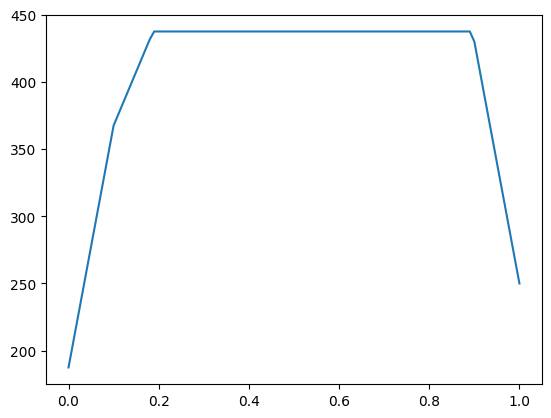

In [87]:
plt.plot(x,profit) #plotting for different values of profit to x

In [90]:
model7=ConcreteModel()
model7.x1 = Var(domain = PositiveReals)
model7.x2 = Var(domain = PositiveReals)
model7.y1 = Var(domain = PositiveReals)
model7.y2 = Var(domain = PositiveReals)
model7.x  = Var(domain = PositiveReals)
model7.constr1=Constraint(expr = 1*model7.x <= 1)

model7.constr2=Constraint(expr = 1*model7.x1 +1*model7.x2 + -120*model7.x <= 0)
model7.constr3=Constraint(expr = 1*model7.y1 +1*model7.y2  + 120*model7.x <= 120)
model7.constr4=Constraint(expr = 4*model7.x1 +2*model7.x2 <= 80)
model7.constr5=Constraint(expr = 2*model7.x1 +5*model7.x2 <= 60)
model7.constr6=Constraint(expr = 5*model7.y1 +3*model7.y2 <= 60)
model7.constr7=Constraint(expr = 5*model7.y1 +6*model7.y2 <= 75)

model7.cost = Objective(expr = 10*model7.x1 + 15*model7.x2 + 10*model7.y1 +15*model7.y2,sense=maximize)


In [91]:
model7.pprint()

5 Var Declarations
    x : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : PositiveReals
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : PositiveReals
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : PositiveReals
    y1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : PositiveReals
    y2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : PositiveReals

1 Objective Declarations
    cost : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 10*x1 + 15*x2 + 10*y1 + 15*y2

7 Cons

In [92]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model7).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 437.5
  Upper bound: 437.5
  Number of objectives: 1
  Number of constraints: 7
  Number of variables: 5
  Number of nonzeros: 15
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.0029892921447753906
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------

In [94]:
print('\nCost = ', model7.cost())
print('x1 = ', model7.x1())
print('x2 = ', model7.x2())
print('y1 = ', model7.y1())
print('y2 = ', model7.y2())
print('x = ', model7.x())


print('\nConstraints')
print('Constraint 1 = ', model7.constr1())
print('Constraint 2 = ', model7.constr2())
print('Constraint 3 = ', model7.constr3())
print('Constraint 4 = ', model7.constr4())
print('Constraint 5 = ', model7.constr5())
print('Constraint 6 = ', model7.constr6())


Cost =  437.5
x1 =  17.5
x2 =  5.0
y1 =  0.0
y2 =  12.5
x =  0.1875

Constraints
Constraint 1 =  0.1875
Constraint 2 =  0.0
Constraint 3 =  35.0
Constraint 4 =  80.0
Constraint 5 =  60.0
Constraint 6 =  37.5


In [45]:
model8=ConcreteModel() # defining the model for dual for problem 3

In [95]:
model8.w1 = Var(domain = PositiveReals)
model8.w2 = Var(domain = PositiveReals)
model8.w3 = Var(domain = PositiveReals)
model8.w4 = Var(domain = PositiveReals)
model8.w5 = Var(domain = PositiveReals)
model8.w6 = Var(domain = PositiveReals)


model8.constr2=Constraint(expr = 1*model8.w1 +4*model8.w3 + 2*model8.w4 >= 10)
model8.constr3=Constraint(expr = 1*model8.w1 +2*model8.w3  + 5*model8.w4 >= 15)
model8.constr4=Constraint(expr = 1*model8.w2 +5*model8.w5 + 5*model8.w6 >= 10)
model8.constr5=Constraint(expr = 1*model8.w2 +3*model8.w5 + 6*model8.w6 >= 15)
model8.constr6=Constraint(expr = -120*model8.w1 + 120*model8.w2 >= 0)
#objective of dual is to minimize
model8.cost = Objective(expr = 120*model8.w2 + 80*model8.w3 + 60*model8.w4 +60*model8.w5 + 70*model8.w6,sense=minimize)

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


In [96]:
model8.pprint()

6 Var Declarations
    w1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : PositiveReals
    w2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : PositiveReals
    w3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : PositiveReals
    w4 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : PositiveReals
    w5 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : PositiveReals
    w6 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : PositiveReals

1 Objective Declarations
 

In [97]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model8).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 425.0
  Upper bound: 425.0
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 6
  Number of nonzeros: 14
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.008431196212768555
# ----------------------------------------------------------
#   Solution Information
# -----------------------------------

In [98]:
print('\nCost = ', model8.cost())
print('w1 = ', model8.w1())
print('w2 = ', model8.w2())
print('w3 = ', model8.w3())
print('w4 = ', model8.w4())
print('w5 = ', model8.w5())
print('w6 = ', model8.w6())


print('\nConstraints')

print('Constraint 2 = ', model8.constr2())
print('Constraint 3 = ', model8.constr3())
print('Constraint 4 = ', model8.constr4())
print('Constraint 5 = ', model8.constr5())
print('Constraint 6 = ', model8.constr6())



Cost =  425.0
w1 =  0.0
w2 =  0.0
w3 =  1.25
w4 =  2.5
w5 =  0.0
w6 =  2.5

Constraints
Constraint 2 =  10.0
Constraint 3 =  15.0
Constraint 4 =  12.5
Constraint 5 =  15.0
Constraint 6 =  0.0


In [101]:
model9=ConcreteModel() # creating the dual for refinary D
model9.x1 = Var(domain = PositiveReals)
model9.x2 = Var(domain = PositiveReals)
model9.x3 = Var(domain = PositiveReals)
model9.constr1=Constraint(expr = 1*model9.x1 +4*model9.x2 + 2*model9.x3 >= 10)
model9.constr2=Constraint(expr = 1*model9.x1 +2*model9.x2  + 5*model9.x3 >= 15)
model9.cost = Objective(expr = 60*model9.x1 + 80*model9.x2 + 60*model9.x3 ,sense=minimize)



In [102]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model9).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 250.0
  Upper bound: 250.0
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 3
  Number of nonzeros: 6
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.0076446533203125
# ----------------------------------------------------------
#   Solution Information
# --------------------------------------

In [104]:
print('\nCost = ', model9.cost())
print('x1 = ', model9.x1())
print('x2 = ', model9.x2())
print('x3 = ', model9.x3())
print('Constraint 1 = ', model9.constr1())
print('Constraint 2 = ', model9.constr2())



Cost =  250.0
x1 =  0.0
x2 =  1.25
x3 =  2.5
Constraint 1 =  10.0
Constraint 2 =  15.0
